project

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
connection=mysql.connector.connect(
    user='root',
    password='Prathi@23',
    host='localhost',
    database='anudipproject'
)

In [3]:
cursor=connection.cursor()

In [4]:
cursor.execute('SELECT * FROM SocialMediaUsage1')

In [5]:
data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
#to get a staring 5 column default
print(data.head())

   User_ID  Age      Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
0       10   31        Male  Instagram               170              5   
1      877   32      Female  Instagram               155              6   
2      230   26  Non-binary   Facebook                45              1   
3      876   28  Non-binary   Snapchat               115              3   
4      376   28  Non-binary   Snapchat               115              3   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      80                         20                     35   
1                      75                         25                     38   
2                       8                          4                     12   
3                      38                         18                     27   
4                      38                         18                     27   

  Dominant_Emotion  
0        Happiness  
1        Happiness  
2          

In [8]:
#to get last  5 column default
print(data.tail())

     User_ID  Age      Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
142      277   27  Non-binary   LinkedIn                55              1   
143      830   26  Non-binary   Facebook                45              1   
144      109   29      Female   LinkedIn                55              2   
145       99   21      Female   Facebook                75              2   
146      493   24      Female  Instagram               200              6   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
142                       9                          2                     11   
143                       8                          4                     12   
144                      15                          5                     10   
145                      25                         13                     19   
146                     100                         18                     39   

    Dominant_Emotion  
142          Anxiety  
143 

In [9]:
#to get the number of columns in table
print(data.columns)

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


In [10]:
#the total summary of data
print(data.describe())

          User_ID         Age  Daily_Usage_Time  Posts_Per_Day  \
count  147.000000  147.000000        147.000000     147.000000   
mean   483.462585   27.244898         94.557823       3.605442   
std    280.687104    3.902215         43.036323       2.150367   
min      5.000000   21.000000          1.000000       1.000000   
25%    236.500000   24.000000         60.000000       2.000000   
50%    466.000000   27.000000         85.000000       3.000000   
75%    733.000000   30.000000        120.000000       5.000000   
max    986.000000   35.000000        200.000000      10.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count              147.000000                 147.000000   
mean                38.782313                  15.510204   
std                 26.605313                  10.170712   
min                  2.000000                   2.000000   
25%                 20.000000                   8.000000   
50%                 33.000000                

In [11]:
#to get the information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    147 non-null    int64 
 1   Age                        147 non-null    int64 
 2   Gender                     147 non-null    object
 3   Platform                   147 non-null    object
 4   Daily_Usage_Time           147 non-null    int64 
 5   Posts_Per_Day              147 non-null    int64 
 6   Likes_Received_Per_Day     147 non-null    int64 
 7   Comments_Received_Per_Day  147 non-null    int64 
 8   Messages_Sent_Per_Day      147 non-null    int64 
 9   Dominant_Emotion           147 non-null    object
dtypes: int64(7), object(3)
memory usage: 11.6+ KB
None


In [12]:
#to check the null values
print(data.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Platform                     0
Daily_Usage_Time             0
Posts_Per_Day                0
Likes_Received_Per_Day       0
Comments_Received_Per_Day    0
Messages_Sent_Per_Day        0
Dominant_Emotion             0
dtype: int64


In [13]:
#to remove null
data_cleaned = data.dropna()
print(data_cleaned)

     User_ID  Age      Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
0         10   31        Male  Instagram               170              5   
1        877   32      Female  Instagram               155              6   
2        230   26  Non-binary   Facebook                45              1   
3        876   28  Non-binary   Snapchat               115              3   
4        376   28  Non-binary   Snapchat               115              3   
..       ...  ...         ...        ...               ...            ...   
142      277   27  Non-binary   LinkedIn                55              1   
143      830   26  Non-binary   Facebook                45              1   
144      109   29      Female   LinkedIn                55              2   
145       99   21      Female   Facebook                75              2   
146      493   24      Female  Instagram               200              6   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_D

In [14]:
#to check duplicate
print(data.duplicated().sum())

6


In [15]:
# Removing duplicate rows
data_no_duplicates = data.drop_duplicates()

In [16]:
# Displaying the number of rows after removing duplicates
print(len(data_no_duplicates))

141


In [17]:
# Verifying no duplicates remain
print(data_no_duplicates.duplicated().sum())

0


In [18]:
# Displaying the cleaned data
print("\nCleaned Data:")
print(data_no_duplicates)


Cleaned Data:
     User_ID  Age      Gender   Platform  Daily_Usage_Time  Posts_Per_Day  \
0         10   31        Male  Instagram               170              5   
1        877   32      Female  Instagram               155              6   
2        230   26  Non-binary   Facebook                45              1   
3        876   28  Non-binary   Snapchat               115              3   
4        376   28  Non-binary   Snapchat               115              3   
..       ...  ...         ...        ...               ...            ...   
142      277   27  Non-binary   LinkedIn                55              1   
143      830   26  Non-binary   Facebook                45              1   
144      109   29      Female   LinkedIn                55              2   
145       99   21      Female   Facebook                75              2   
146      493   24      Female  Instagram               200              6   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Mess

In [19]:
data_no_duplicates['Age'] = pd.to_numeric(data_no_duplicates['Age'], errors='coerce')
average_age = data_no_duplicates['Age'].mean()
print("\nAverage age of users:")
print(average_age)


Average age of users:
27.21985815602837


In [20]:
#average time spend on social media

# Ensure 'Daily_Usage_Time (minutes)' column is numeric, coercing errors
data_no_duplicates['Daily_Usage_Time'] = pd.to_numeric(data_no_duplicates['Daily_Usage_Time'], errors='coerce')

# Drop rows with NaN values in 'Daily_Usage_Time (minutes)' column
data_no_duplicates = data_no_duplicates.dropna(subset=['Daily_Usage_Time'])

# Calculate the mean daily usage time by platform
platform_usage_time = data_no_duplicates.groupby('Platform')['Daily_Usage_Time'].mean()

# Display the result
print("\nAverage daily usage time by platform:")
print(platform_usage_time)


Average daily usage time by platform:
Platform
Facebook      67.088235
Instagram    144.243243
LinkedIn      62.105263
Snapchat      93.235294
Telegram      75.000000
Twitter       88.500000
Whatsapp      94.000000
Name: Daily_Usage_Time, dtype: float64


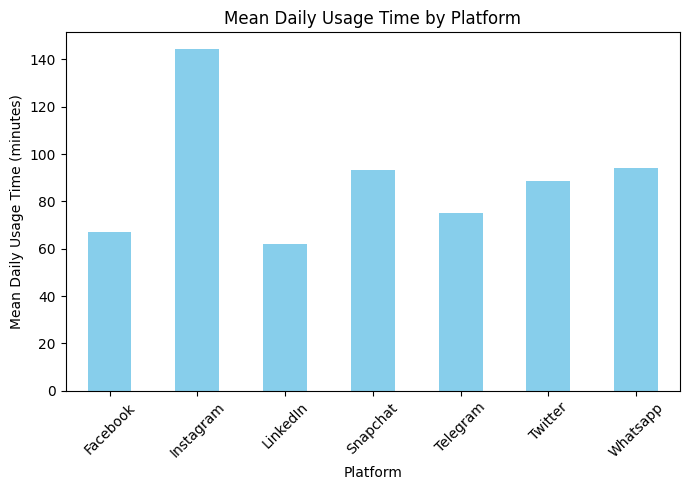

In [21]:
plt.figure(figsize=(7, 5))
platform_usage_time.plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Mean Daily Usage Time (minutes)')
plt.title('Mean Daily Usage Time by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
#what are the typical emotion responses to social media interaction?

# Count the occurrences of each dominant emotion
emotion_counts = data['Dominant_Emotion'].value_counts()

# Display the emotion counts
print("Distribution of Dominant Emotions:")
print(emotion_counts)


Distribution of Dominant Emotions:
Dominant_Emotion
Anxiety       31
Neutral       30
Happiness     28
Sadness       25
Boredom       18
Anger         14
Aggression     1
Name: count, dtype: int64


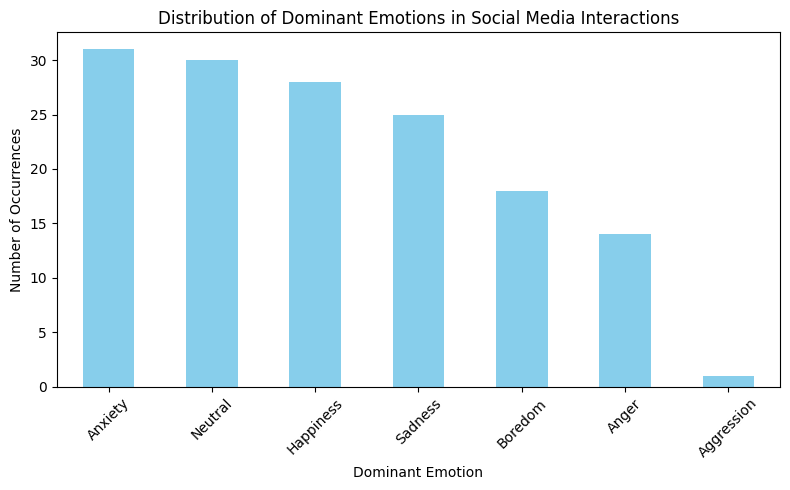

In [23]:
# Plotting
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Emotion')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Dominant Emotions in Social Media Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
#How does social media usage vary across different platform?

# List of columns to be converted to numeric
numeric_columns = ['Daily_Usage_Time', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Convert the relevant columns to numeric, coercing errors to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the numeric columns
data = data.dropna(subset=numeric_columns)

# Group by Platform and calculate the mean of usage metrics
platform_usage = data.groupby('Platform')[numeric_columns].mean()

# Display the average social media usage across platforms
print("Average Social Media Usage Across Platforms:")
print(platform_usage)

Average Social Media Usage Across Platforms:
           Daily_Usage_Time  Posts_Per_Day  Likes_Received_Per_Day  \
Platform                                                             
Facebook          67.314286       2.514286               21.228571   
Instagram        144.131579       5.921053               70.736842   
LinkedIn          62.105263       1.842105               14.736842   
Snapchat          94.722222       3.111111               33.666667   
Telegram          75.000000       2.571429               29.285714   
Twitter           87.480000       3.600000               36.760000   
Whatsapp          94.000000       3.600000               52.000000   

           Comments_Received_Per_Day  Messages_Sent_Per_Day  
Platform                                                     
Facebook                   10.000000              18.800000  
Instagram                  24.973684              32.315789  
LinkedIn                    5.736842              14.368421  
Snapchat      

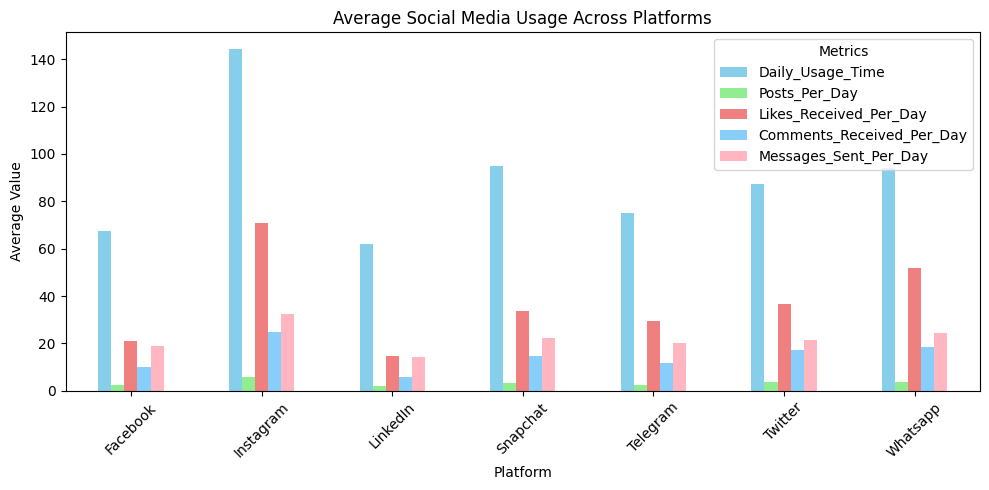

In [25]:
# Plotting
plt.figure(figsize=(10, 5))

# Plotting all metrics in one figure
platform_usage.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Average Social Media Usage Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper right')
plt.tight_layout()
plt.show()

In [26]:
#is there a correlation between different social media usage patterns and emotional well-being?

# Select only the numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            User_ID       Age  Daily_Usage_Time  \
User_ID                    1.000000  0.059828          0.036286   
Age                        0.059828  1.000000          0.112074   
Daily_Usage_Time           0.036286  0.112074          1.000000   
Posts_Per_Day              0.056397  0.060569          0.682338   
Likes_Received_Per_Day     0.070805  0.105414          0.884683   
Comments_Received_Per_Day  0.066510  0.120568          0.569545   
Messages_Sent_Per_Day      0.059212  0.089856          0.675736   

                           Posts_Per_Day  Likes_Received_Per_Day  \
User_ID                         0.056397                0.070805   
Age                             0.060569                0.105414   
Daily_Usage_Time                0.682338                0.884683   
Posts_Per_Day                   1.000000                0.733209   
Likes_Received_Per_Day          0.733209                1.000000   
Comments_Received_Per_Day       0.6

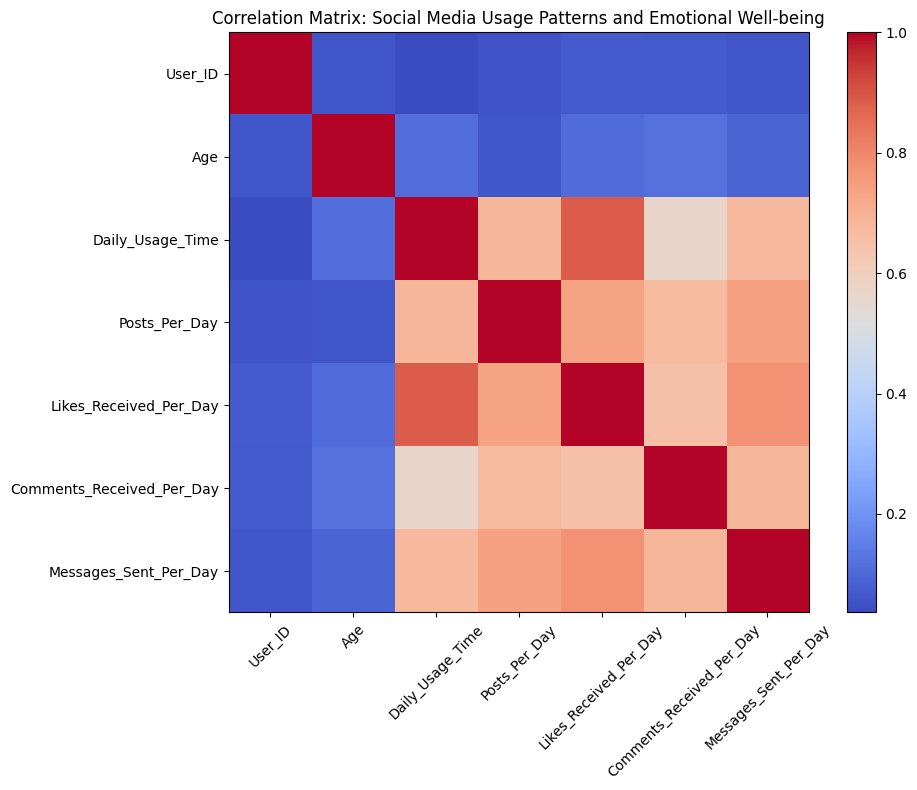

In [27]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Adding a colorbar
plt.colorbar()

# Adding labels to axes
tick_labels = list(numeric_data.columns)
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)
plt.yticks(range(len(tick_labels)), tick_labels)

plt.title('Correlation Matrix: Social Media Usage Patterns and Emotional Well-being')
plt.tight_layout()
plt.show()

In [28]:
#how can we quantify the emotional well-being risk associated with different social media usage patterns?

# Define which emotions are considered negative
negative_emotions = ['Sadness', 'Anger', 'Fear']

# Create a new column to quantify emotional risk
data['Emotional_Risk'] = data['Dominant_Emotion'].apply(lambda x: 1 if x in negative_emotions else 0)

# Analyze the risk associated with different usage patterns
risk_by_platform = data.groupby('Platform')['Emotional_Risk'].mean()

# Display the emotional risk by platform
print("Emotional Risk by Platform:")
print(risk_by_platform)

Emotional Risk by Platform:
Platform
Facebook     0.228571
Instagram    0.131579
LinkedIn     0.157895
Snapchat     0.277778
Telegram     0.428571
Twitter      0.520000
Whatsapp     0.400000
Name: Emotional_Risk, dtype: float64


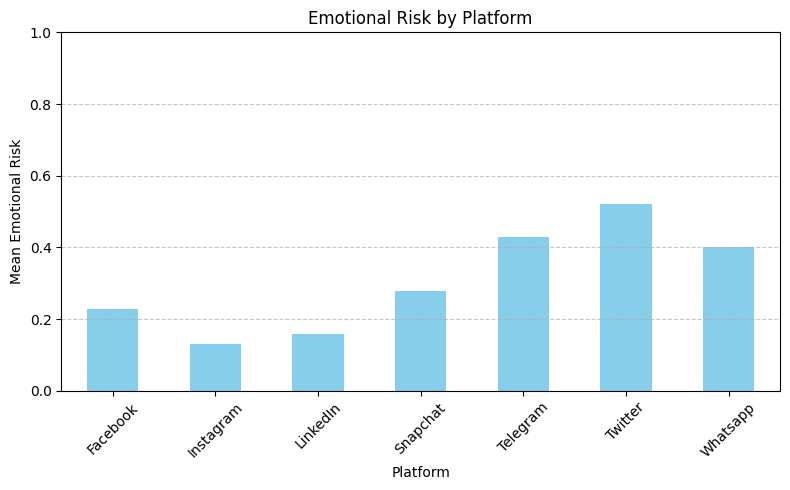

In [29]:
# Plotting emotional risk by platform
plt.figure(figsize=(8, 5))
risk_by_platform.plot(kind='bar', color='skyblue')
plt.title('Emotional Risk by Platform')
plt.xlabel('Platform')
plt.ylabel('Mean Emotional Risk')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()